# Processing Interaction dat files from Maestro
### Created by Melissa Alegría Arcos


In [55]:
#Install dependences
!pip install openpyxl

### Transform .dat files to CSV files

In [56]:
#PL-Contacts_HBond
!cat "PL-Contacts_HBond.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,AtomNAme,LigandFragment,LigandAtomName"}; NR > 1{print $1, $2, $3, $4, $5, $6, $7}' >PL-Contacts_HBond.csv

#PL-Contacts_Hydrophobic.dat
!cat "PL-Contacts_Hydrophobic.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,LigandFragment"}; NR > 1{print $1, $2, $3, $4, $5}' >PL-Contacts_Hydrophobic.csv

#PL-Contacts_Ionic.dat
!cat "PL-Contacts_Ionic.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,AtomName,LigandFragment,LigandAtom,Distance"}; NR > 1{print $1, $2, $3, $4, $5, $6, $7, $8}' >PL-Contacts_Ionic.csv

#PL-Contacts_Pi-Cation.dat
!cat "PL-Contacts_Pi-Cation.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,LigandFragment,Distance"}; NR > 1{print $1, $2, $3, $4, $5, $6}' >PL-Contacts_Pi-Cation.csv

#PL-Contacts_Pi-Pi
!cat "PL-Contacts_Pi-Pi.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,LigandFragment,Distance,Type"}; NR > 1{print $1, $2, $3, $4, $5, $6, $7}' >PL-Contacts_Pi-Pi.csv

#PL-Contacts_WaterBridge.dat
!cat "PL-Contacts_WaterBridge.dat" | awk 'BEGIN{ OFS=","; print "Frame,Residue,Chain,Resname,AtomName,LigandFragment,LigandAtom"}; NR > 1{print $1, $2, $3, $4, $5, $6, $7}' >PL-Contacts_WaterBridge.csv


### Here we process all the .csv files that are in the folder with a "for" loop.

In [57]:
# Import pandas, glob and os
import pandas as pd
import glob
import os

# use glob to get all the csv files 
# in the folder
path = os.getcwd()
csv_files = glob.glob(os.path.join(path, "*.csv"))

In [58]:
# loop over the list of csv files
lista = []

for f in csv_files:
    #get the name
    file_name = f.split("/")[-1]
    if file_name != "PL-Contacts_Metal.csv":
        print("Analizando {}".format(file_name))
        #read the csv file
        df = pd.read_csv(f)
        df["Resid"] = df["Resname"].str.capitalize() + df["Residue"].astype(str)        
        subset = df.loc[:, ["Frame", "Resid", "Residue"]]
        
        #Get the frames + 1 because the first is 0
        n = subset["Frame"].max() + 1
        
        #Get the frecuency and add the name to the columns
        frec = subset["Resid"].value_counts() / n 
        new_df = pd.DataFrame(frec).reset_index()
        #Extract the number of residue
        new_df.columns = ['Resid','{}'.format(file_name.split("_")[1].split(".")[0])]
        new_df["Residue"] = new_df["Resid"].str.extract('(\d+)').astype(int)
        #Sort by number of residue
        new_df = new_df.set_index("Resid")
        new_df = new_df.sort_values(["Residue"], ascending=True)
        #Borrar la columna Residue
        new_df = new_df.drop(["Residue"], axis = 1)
        lista.append(new_df)
        

Analizando PL-Contacts_Hydrophobic.csv
Analizando PL-Contacts_WaterBridge.csv
Analizando PL-Contacts_Ionic.csv
Analizando PL-Contacts_Pi-Pi.csv
Analizando PL-Contacts_Pi-Cation.csv
Analizando PL-Contacts_HBond.csv


In [59]:
#Null values = 0
data_final = pd.concat(lista, axis = 1)
data_final = data_final.fillna(0)

In [60]:
data_final

,Hydrophobic,WaterBridge,Ionic,Pi-Pi,Pi-Cation,HBond
Resid,,,,,,
Leu27,0.006494,0.000000,0.0,0.000000,0.0,0.000000
Met49,0.346154,0.003497,0.0,0.000000,0.0,0.005994
Cys145,0.001998,0.002997,0.0,0.000000,0.0,0.021479
Met165,0.070430,0.000000,0.0,0.000000,0.0,0.000000
Thr24,0.000000,0.021479,0.0,0.000000,0.0,0.000000
Thr25,0.000000,0.004995,0.0,0.000000,0.0,0.000000
Thr26,0.000000,0.514985,0.0,0.000000,0.0,0.022478
His41,0.000000,0.006993,0.0,0.565435,0.0,0.000000
Cys44,0.000000,0.002498,0.0,0.000000,0.0,0.643357


In [61]:
#Sort again
data_final["Resid"] = data_final.index
data_final["Residue"] = data_final["Resid"].str.extract('(\d+)').astype(int)
data_final = data_final.set_index("Resid")
data_final = data_final.sort_values(["Residue"], ascending=True)
#drop Residue Column
data_final = data_final.drop(["Residue"], axis = 1)
#Rename de index name
data_final.index.names = ["Residue"]
display(data_final)


,Hydrophobic,WaterBridge,Ionic,Pi-Pi,Pi-Cation,HBond
Residue,,,,,,
Thr24,0.000000,0.021479,0.0,0.000000,0.0,0.000000
Thr25,0.000000,0.004995,0.0,0.000000,0.0,0.000000
Thr26,0.000000,0.514985,0.0,0.000000,0.0,0.022478
Leu27,0.006494,0.000000,0.0,0.000000,0.0,0.000000
His41,0.000000,0.006993,0.0,0.565435,0.0,0.000000
Cys44,0.000000,0.002498,0.0,0.000000,0.0,0.643357
Thr45,0.000000,0.000000,0.0,0.000000,0.0,0.003497
Ser46,0.000000,0.011988,0.0,0.000000,0.0,0.000500
Glu47,0.000000,0.000500,0.0,0.000000,0.0,0.000000


In [62]:
#Save to excel file
data_final.to_excel("Interaction.xlsx")

## This step if you need show a rapid plot (Testing on MacBook pro-retina)

In [71]:
# Set the figure size - handy for larger output
from matplotlib import pyplot as plt
#Choose an style
# https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html
#plt.style.use('fivethirtyeight') 
plt.style.use('ggplot')
# Size
plt.rcParams["figure.figsize"] = [15, 6]
# Set up with a higher resolution screen (useful on Mac)
#%config InlineBackend.figure_format = 'retina'

### Read the excel file and plot

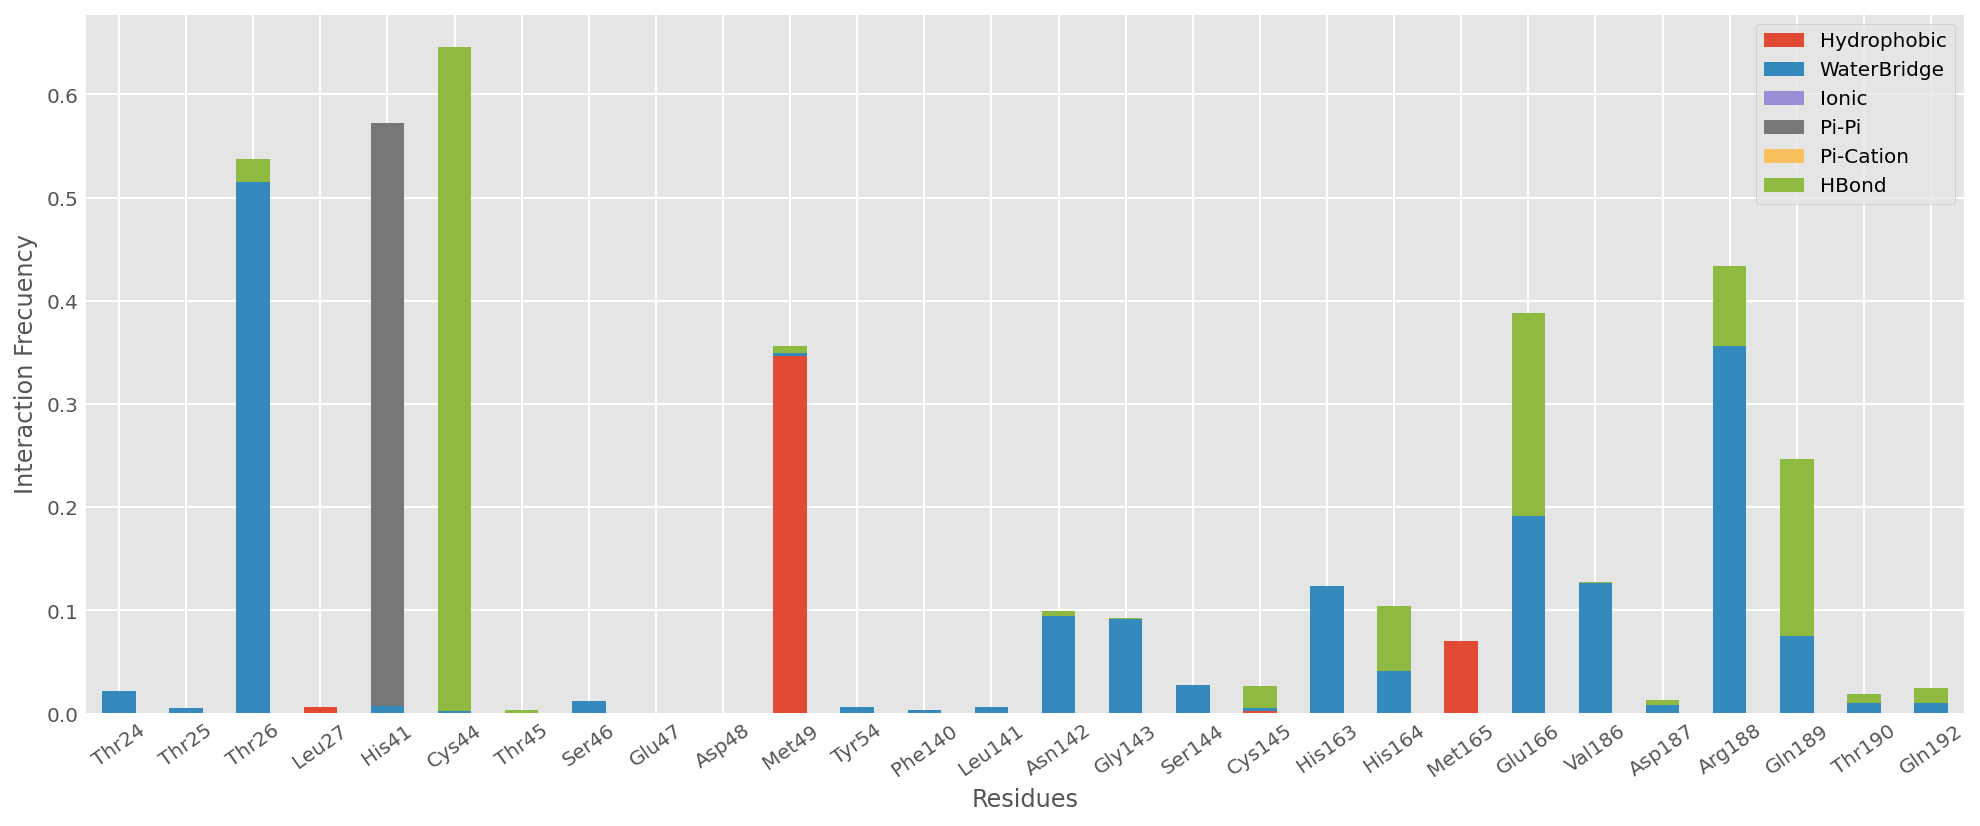

In [89]:
out = pd.read_excel('Interaction.xlsx')
out.plot.bar(x='Residue', stacked=True)
plt.ylabel("Interaction Frecuency")
plt.xlabel("Residues")
plt.xticks(rotation=35)
plt.savefig('Interaction.png')
plt.show()